# CONTEXT-CONDITIONAL GENERATIVE ADVERSARIAL NETWORKS

Abstract : This research paper was produced by Emily Denton, Sam Gross and Rob Fergus. The team has trained images using semi-supervised learning approach based on in-painting using Adverserial Loss. 

Basic Understanding of the Concept :
Images with random patches removed are fed to the generator. 
The generator fills in the gaps (the missing patch) based on the surrounding pixels. 
These in-painted images are then fed to the discriminator network, which decides if the fed image is real or fake. 

# What is GANs?

GANs in general :

GANs is a framework of training generative models. The generative and the discriminator network are made to compete each other in the quest to win over the other. The generator is trained to synthesize images resembling the data distribution, on the contrary the discriminator is trained to distinguish between the sample provided by the generator and the training data.

With every sample turned in, the generator produces images, which are close to the original image with the motive to fool the discriminator. And with every correctly identified fake image, the discriminator auto-tunes itself to become a better identifier between the fake and the real image. 

# Challenges in using GAN and counter-measures to handle them :

GANs are known to be difficult to train. To train them better, there are some tricks(heuristics, not backed by theory) mentioned as below :

•	We use tanh as the last activation  function in our generator.


•	For training deep learning model better, sparsity is introduced using Max Pooling and ReLU activations. Even though this is highly favourable for deep learning, it induces sparsity while training GANs and hence not used in training GANs. Downsampling being preferred in GANs, strided convolutions is used instead of max pooling and as well leaky ReLU is used since it allows small negative activation values reducing sparsity unlike ReLU. 


•	To avoid stagnancy in the network, we use dropout function in the discriminator and/or add random noise in the labels to discriminator to introduce randomness.

# What is a Context Conditional Generative Adversarial Network ?

CC-GANs are conditional GANs and they work as below :
1.	The generator and discriminator are trained with labelled data while training and qualify as ‘Real Image’
2.	These images, however with a missing patch is then fed as input to the generator.
3.	The generator produces a complete in-paint image with the missing patch filled conditioned on the surrounding pixels. 
4.	Further this complete image is fed to the discriminator, for it to identify the real and the fake image.

# Train GAN Model using STL-10 dataset

Dataset used : STL-10

Information about the dataset used : This dataset is an image recognition dataset for deep learning of high resolution (96x96) 

Overview :
10 classes : airplane, bird, car, cat, dog, deer, horse, monkey, ship, truck
500 training images(10 pre-defined folds), 800 test images per class
100000 unlabelled images for unsupervised learning.  Images acquired from ImageNet.

# Data Download

Data is downloaded and extracted locally from the ai.standford.edu website. Images and labels are stored in separate paths. Images are forcibly read in the 96x96 image matrix in the rgb channel. We also transpose the images since we are looking to reduce sparsity consumed by the 3 channels(rgb), this is unlikely if the modelling algorithm is a CNN based algorithm.

In [17]:
from __future__ import print_function

import sys
import os, sys, tarfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()


def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

if __name__ == "__main__":
    # download data if needed
    download_and_extract()

    # test to check if the image is read correctly
    with open(DATA_PATH) as f:
        image = read_single_image(f)
        plot_image(image)

    # test to check if the whole dataset is read correctly
    images = read_all_images(DATA_PATH)
    print(images.shape)

    labels = read_labels(LABEL_PATH)
    print(labels.shape)

sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


(5000, 96, 96, 3)
(5000,)


Import Everything

In [18]:
from __future__ import print_function, division

from keras_contrib.layers.normalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, GaussianNoise
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers import Concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import losses
from keras.utils import to_categorical
import keras.backend as K
import scipy
from skimage.transform import resize

import matplotlib.pyplot as plt

import numpy as np

Initialize all the parameters

In [19]:
img_rows = 64
img_cols = 64
mask_height = 32
mask_width = 32
channels = 3
num_classes = 10
img_shape = (img_rows, img_cols, channels)

In [20]:
optimizer = Adam(0.0002, 0.5)

# Discriminator

Note : We are using strided convolutions and Leaky Relu as best practise

# Architecture of the Discriminator

We trained our CC-GAN and CC-GAN2 models on 96x96 image 
Crops of 96x96 image into 64x64 image with a missing patch of 32x32 pixels. We trained for 2000 epochs and then fine tuned the discriminator on the 96x96 labeled images, stopping when the training reached 100% accuracy.

In [21]:
img = Input(shape=img_shape)

model = Sequential()
model.add(Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=img_shape))
model.add(LeakyReLU(alpha=0.8))
model.add(Conv2D(128, kernel_size=4, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(InstanceNormalization())
model.add(Conv2D(256, kernel_size=4, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(InstanceNormalization())
model.add(Conv2D(512, kernel_size=4, strides=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(InstanceNormalization())

model.summary()

img = Input(shape=img_shape)
features = model(img)

validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(features)

label = Flatten()(features)
label = Dense(num_classes+1, activation="softmax")(label)

discriminator = Model(img, [validity, label])

discriminator.compile(loss=['mse', 'categorical_crossentropy'],
    loss_weights=[0.5, 0.5],
    optimizer=optimizer,
    metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 64)        3136      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       131200    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
instance_normalization_11 (I (None, 16, 16, 128)       2         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 256)         524544    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 8, 8, 256)         0         
__________

# Generator

We have used tanh as the last activation function and used Leaky ReLU to reduce sparsity for training our GAN better.

Our model is architectured as below :
- Downsampling Convolution 2D layer1 of 64 filters each of size 4x4 
- Downsampling Convolution 2D layer2 of 128 filters each of size 4x4
- Downsampling Convolution 2D layer3 of 256 filters each of size 4x4 
- Downsampling Convolution 2D layer4 of 512 filters each of size 4x4 

- Upsampling Convolution 2D layer1 of 128 filters each of size 4x4
- Upsampling Convolution 2D layer2 of 64 filters each of size 4x4
- Upsampling Convolution 2D layer3 of 32 filters each of size 4x4
- Upsampling Convolution 2D layer3 of 16 filters each of size 4x4

Our input image pixel size is 96x96 pixel, which we downsample as 64x64 pixel with a 32x32 pixel hole which is randomly located.

In [22]:
input_img = Input(shape=img_shape)


d1 = Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=img_shape)(input_img)
d1 = LeakyReLU(alpha=0.2)(d1)
d1 = InstanceNormalization()(d1)

d2 = Conv2D(128, kernel_size=4, strides=2, padding='same')(d1)
d2 = LeakyReLU(alpha=0.2)(d2)
d2 = InstanceNormalization()(d2)

d3 = Conv2D(256, kernel_size=4, strides=2, padding='same')(d2)
d3 = LeakyReLU(alpha=0.2)(d3)
d3 = InstanceNormalization()(d3)

d4 = Conv2D(512, kernel_size=4, strides=2, padding='same')(d3)
d4 = LeakyReLU(alpha=0.2)(d4)
d4 = InstanceNormalization()(d4)

u1 = UpSampling2D(size=2)(d4)
u1 = Conv2D(128, kernel_size=4, strides=1, padding='same')(u1)
u1 = LeakyReLU(alpha=0.2)(u1)
u1 = InstanceNormalization()(u1)
u1 = Concatenate()([u1, d3]) 

u2 = UpSampling2D(size=2)(u1)
u2 = Conv2D(64, kernel_size=4, strides=1, padding='same')(u2)
u2 = LeakyReLU(alpha=0.2)(u2)
u2 = InstanceNormalization()(u2)
u2 = Concatenate()([u2, d2])

u3 = UpSampling2D(size=2)(u2)
u3 = Conv2D(32, kernel_size=4, strides=1, padding='same')(u3)
u3 = LeakyReLU(alpha=0.2)(u3)
u3 = InstanceNormalization()(u3)
u3 = Concatenate()([u3, d1])

u2 = UpSampling2D(size=2)(u3)
output_img = Conv2D(channels, kernel_size=4, strides=1, padding='same', activation='tanh')(u2)

generator = Model(input_img, output_img)
generator.compile(loss=['binary_crossentropy'],
    optimizer=optimizer)

# Introducing Noise in the generator to add randomness to avoid stagnancy in the network

In [23]:
masked_img = Input(shape=img_shape)
gen_img = generator(masked_img)

In [24]:
discriminator.trainable = False
valid, _ = discriminator(gen_img)

In [25]:
combined = Model(masked_img , valid)
combined.compile(loss=['mse'],
    optimizer=optimizer)

In [10]:
def mask_randomly(imgs):
    y1 = np.random.randint(0, img_rows - mask_height, imgs.shape[0])
    y2 = y1 + mask_height
    x1 = np.random.randint(0, img_rows - mask_width, imgs.shape[0])
    x2 = x1 + mask_width

    masked_imgs = np.empty_like(imgs)
    for i, img in enumerate(imgs):
        masked_img = img.copy()
        _y1, _y2, _x1, _x2 = y1[i], y2[i], x1[i], x2[i],
        masked_img[_y1:_y2, _x1:_x2, :] = 0
        masked_imgs[i] = masked_img

    return masked_imgs
def save_imgs(epoch, imgs):
    r, c = 3, 6

    masked_imgs = mask_randomly(imgs)
    gen_imgs = generator.predict(masked_imgs)

    imgs = (imgs + 1.0) * 0.5
    masked_imgs = (masked_imgs + 1.0) * 0.5
    gen_imgs = (gen_imgs + 1.0) * 0.5

    gen_imgs = np.where(gen_imgs < 0, 0, gen_imgs)

    fig, axs = plt.subplots(r, c)
    for i in range(c):
        axs[0,i].imshow(imgs[i, :, :, 0], cmap='gray')
        axs[0,i].axis('off')
        axs[1,i].imshow(masked_imgs[i, :, :, 0], cmap='gray')
        axs[1,i].axis('off')
        axs[2,i].imshow(gen_imgs[i, :, :, 0], cmap='gray')
        axs[2,i].axis('off')
    fig.savefig("images/gen_%d.png" % epoch)
    plt.close()

def save_model():

    def save(model, model_name):
        model_path = "saved_model/%s.json" % model_name
        weights_path = "saved_model/%s_weights.hdf5" % model_name
        options = {"file_arch": model_path,
                    "file_weight": weights_path}
        json_string = model.to_json()
        open(options['file_arch'], 'w').write(json_string)
        model.save_weights(options['file_weight'])

    save(generator, "ccgan_generator")
    save(discriminator, "ccgan_discriminator")

In [15]:
epochs=20
batch_size=16
save_interval=50

X_train = read_all_images(DATA_PATH)
y_train = read_labels(LABEL_PATH)

X_train = np.array([resize(x, [img_rows, img_cols]) for x in X_train])

X_train = (X_train.astype(np.float32) - 127.5) / 127.5
#X_train = np.expand_dims(X_train, axis=3)
y_train = y_train.reshape(-1, 1)

half_batch = int(batch_size / 2)

disc_loss = []
gen_loss = []

for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    imgs = X_train[idx]
    labels = y_train[idx]

    masked_imgs = mask_randomly(imgs)
    gen_imgs = generator.predict(masked_imgs)

    valid = np.ones((half_batch, 4, 4, 1))
    fake = np.zeros((half_batch, 4, 4, 1))

    labels = to_categorical(labels, num_classes=num_classes+1)
    fake_labels = to_categorical(np.full((half_batch, 1), num_classes), num_classes=num_classes+1)

    d_loss_real = discriminator.train_on_batch(imgs, [valid, labels])
    d_loss_fake = discriminator.train_on_batch(gen_imgs, [fake, fake_labels])
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    masked_imgs = mask_randomly(imgs)
    valid = np.ones((batch_size, 4, 4, 1))
    g_loss = combined.train_on_batch(masked_imgs, valid)
    disc_loss.append(d_loss[0])
    gen_loss.append(g_loss)
    
    print ("%d [Disc loss: %f, opp_acc: %.2f%%, G loss: %f]" % (epoch, d_loss[0], 100*d_loss[4], g_loss))

    if epoch % save_interval == 0:
        # Select a random half batch of images
        idx = np.random.randint(0, X_train.shape[0], 6)
        imgs = X_train[idx]
        save_imgs(epoch, imgs)
        save_model()

d:\anaconda\envs\stable\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
d:\anaconda\envs\stable\lib\site-packages\keras\engine\training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 1.028786, op_acc: 50.00%] [G loss: 0.263962]
1 [D loss: 0.874777, op_acc: 62.50%] [G loss: 0.258566]
2 [D loss: 0.951436, op_acc: 56.25%] [G loss: 0.255029]
3 [D loss: 1.022578, op_acc: 50.00%] [G loss: 0.257346]
4 [D loss: 1.044134, op_acc: 50.00%] [G loss: 0.256030]
5 [D loss: 1.021501, op_acc: 50.00%] [G loss: 0.258349]
6 [D loss: 1.025190, op_acc: 50.00%] [G loss: 0.262236]
7 [D loss: 0.884555, op_acc: 62.50%] [G loss: 0.257818]
8 [D loss: 1.029962, op_acc: 50.00%] [G loss: 0.259205]
9 [D loss: 0.923295, op_acc: 56.25%] [G loss: 0.258890]
10 [D loss: 0.966018, op_acc: 56.25%] [G loss: 0.260579]
11 [D loss: 1.033765, op_acc: 50.00%] [G loss: 0.263355]
12 [D loss: 0.955458, op_acc: 56.25%] [G loss: 0.258722]
13 [D loss: 0.977410, op_acc: 56.25%] [G loss: 0.254426]
14 [D loss: 1.034300, op_acc: 50.00%] [G loss: 0.254341]
15 [D loss: 0.964113, op_acc: 56.25%] [G loss: 0.252313]
16 [D loss: 1.061208, op_acc: 50.00%] [G loss: 0.253085]
17 [D loss: 1.017925, op_acc: 50.00%] [G 

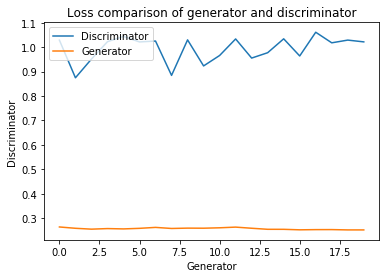

In [16]:
# summarize history for accuracy
plt.plot(disc_loss)
plt.plot(gen_loss)
plt.title('Loss comparison of generator and discriminator')
plt.ylabel('Discriminator')
plt.xlabel('Generator')
plt.legend(['Discriminator', 'Generator'], loc='upper left')
plt.show()